# IQ BIO REU
This tutorial was composed by Taylor Baum with adaptations from the National Science Foundation (NSF) Center for Brains, Minds and Machines Quantitative Methods Workshop and [2].

## Introduction

An **algorithm** is similar to a recipe. More formally, an **algorithm** is a process or set of rules with which a task is completed or with which an input is manipulated to produce an output. For example, we use algorithms for tasks like sorting. 

What if there is a task where the algorithm isn’t obvious? What can we do? Well, we often have a large amount of data that we can use to help inform how we produce appropriate outputs from these inputs. As beautifully defined in [1], "Machine Learning provides automated methods of data analysis that can then be used further. Machine Learning is a set of methods that can automatically detect patterns in data, and then use the uncovered patterns to predict future data, or to perform other kinds of decision making under uncertainty."


## Where did the idea for Machine Learning come from?

Traditionally, humans learn how to do certain tasks from experience in the real-world while computers must be instructed to do things. Machine learning is a field which seeks to enable computers and machines to learn from experience. The experience that computers have access to is known as data. 

Thus far, there are three different ways that a machine can learn: **supervised learning**, **unsupervised learning**, and **reinforcement learning**. We will focus on the first two methods.

**Supervised learning** uses **labeled** data as it’s feature set or the data we initially have to learn patterns from. The labeled data is a set of input-output pairs. In other words, you have input variables (X) and their corresponding output variables (Y) and you want to learn the mapping between these variables.

**Unsupervised learning** uses **unlabeled** data as it’s feature set or the data we initially have to learn patterns from. In **unsupervised learning**, we only have a set of inputs, and the goal is to discover interesting patterns in the data.

Some examples of achievements which are direct results of the benefits of machine learning are AlphaGo, a system which can outperform a champion Go player, face detection on the iPhone, and various object detection paradigms. In the past three examples, we see that these tasks are complex, like a game with many rules. Before Machine Learning approaches, progress towards achieving these tasks was minimal.

## How do we learn from data?

To get an understanding of how patterns and relationships may be uncovered in data to then be used for future predictions or decision making, let's dive into some interactive examples.

Each case where we want to use machine learning is unique, but can be boiled down into a few main components:

1. Identify the input/output relationship you want to understand
2. Identify an approximate model from patterns in the data that explains this relationship
3. Verify the quality of your model
4. Use the model to predict future data or influence future decisions

We will learn that these four steps are useful to guide the development of many machine learning models. We can expand these steps to more specifically reference certain problem spaces, however, these four underlying steps will still be present.

First, we will look at an example of **supervised learning**, where we have a set of input/output pairs and we would like to find a relationship between these inputs and outputs. We will use a very simple synthetic data set.

## Tutorial 1: Least Squares Linear Regression (LSLR)

In this tutorial, we will go through the steps necessary to fit a **Least Squares Linear Regression** model to data. This will help orient you with the basic steps machine learning tasks require with a simple, easy to understand example.

This tutorial is adapted from [2], and may be referred to further explore this example.

The package that is used in this tutorial is referenced in this GitHub repository [3], and may be referred to for further exploration of the structure of the class, `LinearRegression()`, which is implementing **LSLR**. With **LSLR**, we assume that there is some linear relationship between the inputs and the outputs. 

A **first-order linear relationship** is represented mathematically by $y = mx + b$. This is the model that we are trying to fit. We will be solving for the y-intercept or $b$, along with the slope or $m$. Using our learned parameters, we can generate predictions of the output of new input values.

As introduced in [2], we will complete five basic steps to implement linear regression in python:

1. Import the packages and classes necessary for implementation.
2. Identify the data you would like to explore, and ensure it is in the proper format
3. Create the model and fit it with the existing data.
4. Check the results of model fitting to know whether the model is satisfactory.
5. Apply the model for predictions.

These steps are reminiscent of those introduced early with a few more specifics which guide real-world development in coding platforms.

### Step 1: Import Packages and Classes

First, we make sure to import the packages and classes necessary to run the tutorial!

In [1]:
import numpy as np # a package for manipulating numbers and using arrays
from sklearn.linear_model import LinearRegression # a package with an optimized LinearRegression class
import matplotlib.pyplot as plt # a package with plotting capabilities

### Step 2: Provide Data

Next we load and prepare our data. In this case, we are using synthetic data, so there is not much we need to do!

In [2]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1)) # synthetic x-data
y = np.array([5, 20, 14, 32, 22, 38]) # synthetic y-data

# Use these commands to look at the arrays after the .reshape function
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


### Step 3: Create and Fit the Model

Next, we take advantage of the `LinearRegression()` class that we downloaded from the `sklearn` package. First, we create an instance of the `LinearRegression()` class. Next, we use the `.fit(x,y)` method from this class.

In [4]:
model = LinearRegression() # this line is creating an instance of the class LinearRegression
model.fit(x, y) # this line is using a method within the LinearRegression class which fits the model

LinearRegression()

We can actually condense these first two lines to one line, and get an equivalent output! These types of shortcuts make more sense the more one attemtps their own projects.

In [5]:
model = LinearRegression().fit(x, y) # syntactically, this line is equivalent to the two lines above

### Step 4: Get Results

After fitting the model, we would like to explore the results and performance of the model! There are many values we can derive which describe characteristics of our fit. 

$r$, a value between -1 and 1, is the **correlation coefficient**, which will be defined in the tutorial. Values further from 0 indicate a stronger relationship between the two variables.

To derive $r$, we use the function below. Sometimes this function is already coded in packages. We will see that the `.score(x, y)` function outputs the $r^2$ value.

$r = \frac{1}{n-1}\sum\limits_{i}^{n}{\frac{x_i-\bar{x}}{s_x} \frac{y_i-\bar{y}}{s_y}}$

where $\bar{x}$, $\bar{y}$, $s_x$ and $s_y$ are the respecive means and standard deviations of the respective variables. 

$r^2$, ranging from 0 to 1, is the **coefficient of determination**. This is equal to the proportion of the total variability explained by the model. An $r^2$ of 0 means that the dependent variable cannot be predicted from the independent variable. An $r^2$ of 1 means the dependent variable can be predicted without error from the independent variable. To get a deeper look into the underlying mathematics, please reference [5].

In [6]:
r_sq = model.score(x, y) # this line helps show us how good our model is
print('coefficient of determination:', r_sq) # print the model score

coefficient of determination: 0.7158756137479542


From using this `LinearRegression()` class and its method `.fit(x, y)` we have output model which has different methods. Above, we looked at the method `.score(x, y)` which output the $r^2$ value for this set of input output pairs with this trained model.

Below, we extract the learned y-intercept, and slope. We can use these values to then predict unknown input/output pairs in the future!

In [7]:
print('intercept:', model.intercept_) # print the y-intercept
print('slope:', model.coef_) # print the slope

intercept: 5.633333333333329
slope: [0.54]


### Step 5: Make Predictions

After fitting the model, we would now like to visualize the results and then use the results to predict future outputs of new inputs.

predicted response from package:
[11.03333333 16.43333333 21.83333333 19.13333333 31.01333333 11.57333333]


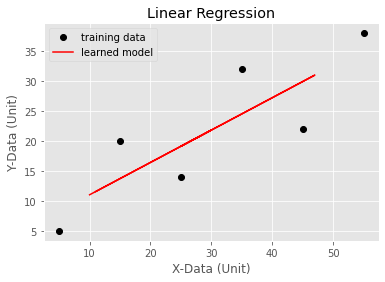

In [18]:
plt.style.use('ggplot') # we use the style 'ggplot' because it is pretty

plt.plot(x, y, 'ko') # plot the original data in black ('k') circles ('o')
x_new = np.array([10, 20, 30, 25, 47, 11]).reshape((-1, 1))
y_pred_package = model.predict(x_new) # use a predefined method to predict outputs from a set of inputs
print('predicted response from package:', y_pred_package, sep='\n') # print prediction results
plt.plot(x_new, y_pred_package, 'ro') # plot the learned relationship in a red ('r') line (default)

# it is crucial to always fully annotate your plots
plt.xlabel('X-Data (Unit)')
plt.ylabel('Y-Data (Unit)')
plt.title('Linear Regression')    
plt.legend(['training data', 'learned model'])   
plt.show() # show the plot generated for each case

Above, we used a built-in function `.predict` to generate our estimated outputs from our learned relationship or the results from the model fit. To show that we understand what we just completed, however, we can verify. that using the parameters we solved for by replacing them in the model equation. If this gives us the same result, then we know that we have a deep understanding of the model!

We know that $y = mx + b$ is the model that we are trying to fit. We solved for the y-intercept or $b$, along with the slope or $m$. Using our learned paramters, we can generate our predictions by coding the equation by hand, as shown below.

predicted response from user:
[11.03333333 16.43333333 21.83333333 19.13333333 31.01333333 11.57333333]


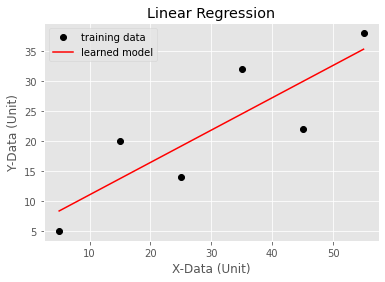

In [20]:
plt.plot(x, y, 'ko') # plot the original data in black ('k') circles ('o')
y_pred_user = (model.coef_ * x) + model.intercept_ # generate the same predicted relationship using paramters
print('predicted response from user:', y_pred_package, sep='\n') # print prediction
plt.plot(x, y_pred_user, 'r') # plot the learned relationship in a red ('r') line (default)

# it is crucial to always fully annotate your plots
plt.xlabel('X-Data (Unit)')
plt.ylabel('Y-Data (Unit)')
plt.title('Linear Regression')    
plt.legend(['training data', 'learned model'])   
plt.show() # show the plot generated for each case

We have successfully learned an approximate relationship between synthetic inputs, x, and outputs, y. We did this through use of a **supervised learning** method, Least Squares Linear Regression. Next, let's explore a method of **unsupervised learning**.

## Tutorial 2: K-means 

In this second tutorial, we will explore a method of **unsupervised learning** known as K-means clustering.

K-means clustering is used to classify data. The ultimate goal is to partition the given data into a few groups or clusters. The way that this algorithm learns the appropriate clusters is by placing centroids randomly on the graph, calculating the distance of each point to its closest centroid, recomputing the centroid as the mean of all points and then iterating. The number of centroids is a user-prescribed parameter.

To get some extra help with the underlying training procedure used in K-means, please watch [4], as it is a great explanation.

Similar to the procedure in LSLR, we will follow a few main steps:

1. Import and download all necessary packages and classes
2. Identify and prepare the data you desire to learn about
3. Create the model and fit it with the existing data.
4. Check the results of model fitting to know whether the model is satisfactory.
5. Apply the model for predictions.

We will use an MEG data set for application of this method.

### Step 1: Import Packages and Classes

Once again, we have to import all of the packages necessary to implement our model. In this case, we are importing two packages unique to the packages used before. The first is the `KMeans()`

In [22]:
import numpy as np # a package with many useful mathmatical functions
import matplotlib.pyplot as plt # a package necessary for plotting
from sklearn.cluster import KMeans # a package which contains a useful KMeans() class
import scipy.io as sio # a package which allows us to upload .mat files or files from MATLAB

### Step 2: Provide Data

In this case, we are using real data from a group of volunteers. Because of this, it is pivotal for us to have a deep understanding of the experiment being performed and what aspect of the experiment the data is encompasing.

In this tutorial, we are looking at data from a **magnetoencephalography (MEG)** experiment. This MEG using $306$ sensors which take readings on the magnetic fields being produced by synchronous neural activity in the brain. If you are looking to get a better understanding of MEG experimental data refer to the video series in [6].

In the specific MEG dataset we are using, each subject viewed $25$ different scenes from five different scene categories (forests, highways, mountains, beaches, cities). We have the MEG responses of each patient for different trials of viewing different scenes within these scene categories.

To summarize, there are:
- $306$ MEG sensors
- $25$ different scenes
- $5$ scene categories
- $1$ scene from $1$ scene category per trial
- $125$ trials
- $1$ value for each sensor's activity per each trial

**We are using K-Means Clustering for this MEG experimental data to see if we can identify possible clusters for each scene category, such that we could predict the categories of MEG data from new trials. If we can do this, this means that the brain is encoding the visual stimuli in a way that is decodable by MEG signals.**

Now let's use a function to see each of the variables within the data files that contain the experimental data.

In [25]:
sio.whosmat('MEG_decoding_data_final.mat') # this gives us a better look at what is contained in the .mat file

[('stim_ID', (1, 125), 'double'),
 ('cat_ID', (1, 125), 'double'),
 ('MEG_data', (125, 306), 'double'),
 ('train_data', (40, 306), 'double'),
 ('train_cat_labels', (1, 40), 'double'),
 ('train_stim_labels', (1, 40), 'double'),
 ('test_data', (10, 306), 'double'),
 ('test_cat_labels', (1, 10), 'double')]

`MEG_data` is a $125\times306$ matrix with $125$ rows and $306$ columns. We know that the $306$ columns most likely corresponds to the number of sensors for the MEG. This means that each column is data from a different sensor. The rows correspond to the data from $125$ different trials. In each trial, the subject viewed one of the 25 images. The units of this value is in Tesla (T).

`stim_ID` is a $1\times125$ matrix or a $125$ column vector containing a value between 1 and 25 indicating which image the subject is viewing for that trial. This makes sense, because in the last matrix, there were 125 rows corresponding to the different trials. So, in this case, we have a vector indicating which stimulus is being shown for each row! This vector is unitless.

`cat_ID` is another $125$ column vector containing which of the 5 stimulus or scene categories each trial was showing. So, instead of an integer between 1 and 25, this vector contains values between 1 and 5 where the integer:category pairs are 'beach':1, 'building':2, 'forest'3, 'highway':4, 'mountain':5. This vector is also unitless.

In [26]:
mat_1 = sio.loadmat('MEG_decoding_data_final.mat') # loads a .mat file

MEG = mat_1['MEG_data'] # isolates the MEG_data array from the dictionary
print(MEG.shape) # prints the dimensions of the data within the variable

stim = mat_1['stim_ID'] # isolates the stim_ID array from the dictionary
print(stim.shape) # prints the dimensions of the data within the variable

cat = mat_1['cat_ID']
print(cat.shape) # prints the dimensions of the data within the variable

(125, 306)
(1, 125)
(1, 125)


In the above code, we have loaded in the two data files, and then isolated the `MEG_data`,  `stim_ID`, and `cat_ID` matrices. Ideally, we would use many of the MEG sensors for our feature set. However, for this tutorial, we want to isolate just two sensors such that we can visualize the data in a two-dimensional plot (the xy plots everyone is used to looking at). The next code section does just that.

In [27]:
current_data = MEG[:, [199, 232]] # isolates only channels 200 and 233 from the data
print(current_data.shape) # prints the shape of the data within the variable

(125, 2)


We want each of the $125$ trials, so we use the `:` syntax in the row parameter. We only want two sensors, so we input a vector with two sensor numbers. When we look at the shape, it shows that we have isolated two columns of $125$ trials, which is what we wanted!

### Step 3: Create and Fit the Model

Now that we have isolated our data, we will fit our model! For K-Means Clustering, we choose the number of clusters before fitting our model. In this case, we choose the number of clusters to fit to be 5, as there are 5 scene categories.

In [29]:
Kmean_MEG = KMeans(n_clusters = 5) # generates an instance of the KMeans() class
Kmean_MEG.fit(current_data) # fits the model

# What could you re-write the above two lines to be to generate the same results?
Kmean_MEG = KMeans(n_clusters = 5).fit(current_data) # generates a class instance and fits the model

### Step 4: Get Results

We have fit our model above, and similar to the steps taking in the first tutorial, we want to look at the performance of our model. First, we will look at the placement of the centers. We do this with the `cluster_centers_` function below.

In [30]:
Kmean_MEG.cluster_centers_

array([[-2.28330688e-12,  1.66916335e-12],
       [-1.03900700e-12,  3.18176183e-13],
       [-1.57613479e-12, -2.04459035e-12],
       [ 8.47937610e-13, -1.31819284e-12],
       [-4.20203258e-12,  1.14788738e-12]])

Next, we would like to visualize the learned centroids from the K-Means Clustering training procedure we just ran. To do this, we simply plot the original data where the x-axis is the MEG data corresponding to one sensor, and the y-axis is the MEG data of our other sensor. We do this below.

In [42]:
plt.style.use('ggplot') # we use the style 'ggplot' because it is pretty

# plot current_data for only sensor 1 x (200) vs current data for only sensor 2 y (233)
plt.plot(current_data[:,0], current_data[:,1], 'ok') # plot the isolated data from out MEG file

# this for loop iterates through some nice colors
for i, color in enumerate(plt.rcParams['axes.prop_cycle']):
    if i == 5: break # we only have 5 cluster centroids we want to plot
    plt.scatter(Kmean_MEG.cluster_centers_[i,0], Kmean_MEG.cluster_centers_[i,1], linewidth = 20, marker = '.', color = color['color']) # plot the centroids

# it is crucial to always fully annotate your plots
plt.xlabel('MEG Data from Sensor 200 (T)')
plt.ylabel('MEG Data from Sensor 233 (T)')
plt.title('Learned K-Means Centroids')
# plt.legend(['original data', 'beach', 'building', 'forest', 'highway', 'mountain'])
plt.show()

IndentationError: unexpected indent (<ipython-input-42-9c6e70a6ab3e>, line 9)

Now, we can look at which points were classified with each cluster by color coding the labeled points. First, we need the learned labels. We isolate these using the function `.labels` from the `KMeans()` class.

In [36]:
lab = Kmean_MEG.labels_ # gives us an array of class labels
print(lab.size) # prints the size of the variable

125


This `lab` variable is a $125$ length row vector containing the learned cluster labels from the K-Means Clustering training procedure. 

If we print the values of this vector, we see that it contains values between $0$ and $4$. This is slightly unexpected, as we intuitively think the vector should be values between $1$ and $5$. Because we are working in Python, our initial index is always $0$ rather than $1$. This means that our first category is labeled as $0$ rather than $1$, as we originally had. This is crucial to keep in mind when coding. Depending on the language you are using, this inital index may change.

With that in mind, let's plot!

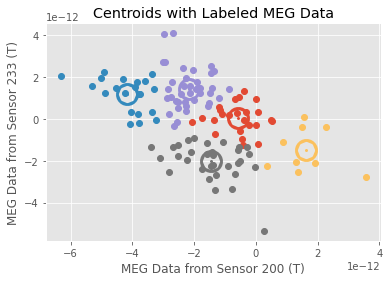

In [41]:
# once again, we are iterating through some nice colors
for i, color in enumerate(plt.rcParams['axes.prop_cycle']):
    if i == 5: break # we only have 5 clusters we want to plot
    idx_tmp = np.nonzero(lab == i) # for each index, isolate the indices where the label s equal to that index
    pt_tmp = current_data[idx_tmp] # isolate the data associated with that index
    plt.plot(pt_tmp[:,0], pt_tmp[:,1], linewidth = 0, marker = 'o', color = color['color']) # plot that isolated data
    plt.scatter(Kmean_MEG.cluster_centers_[i,0], Kmean_MEG.cluster_centers_[i,1], linewidth = 20, marker = '.', color = color['color']) # plot centroids
    
# it is crucial to always fully annotate your plots
plt.xlabel('MEG Data from Sensor 200 (T)')
plt.ylabel('MEG Data from Sensor 233 (T)')
plt.title('Centroids with Labeled MEG Data')    
# plt.legend(['beach', 'building', 'forest', 'highway', 'mountain'])
plt.show() # SHOW YOUR COLORS WOOOO

Awesome! This looks great. We seem to be clustering the data in a reasonable fashion.

Below, we do this same procedure five times, and plot the results. If you looks closly at the figures, you see that the colors are changing with each plot. But, not only are the colors changing; the actual cluster designations or labels are changing themselves. Each time we run the K-Means Clustering algorithm, we get a new set of centroids, and a new set of labels.

This variability occurs because of the design of the training procedure. We begin with randomly placed centroids. This random placement means that the process leading up to the final learned clusters is almost always different and, subsequently, the final cluster positions may vary slightly with each instance of K-Means. Look for this in the plots below!

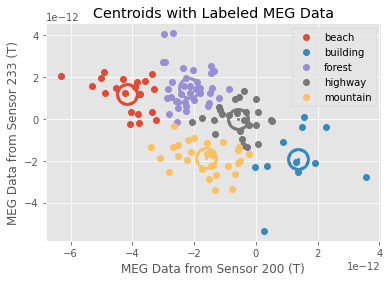

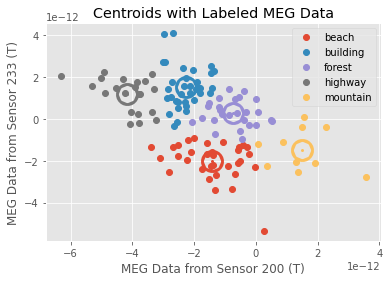

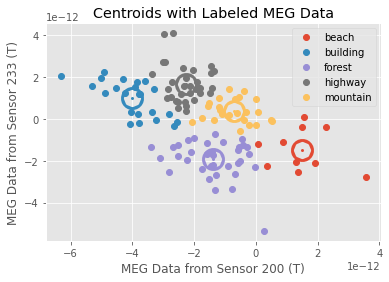

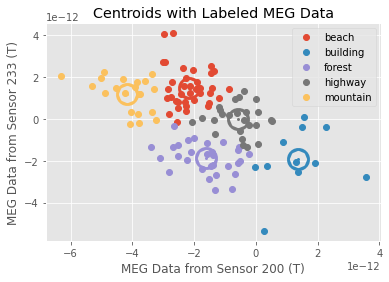

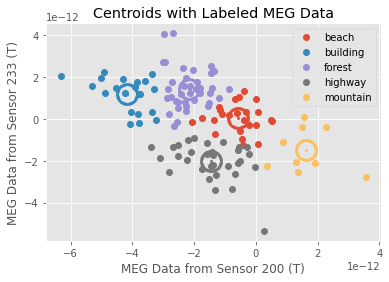

In [39]:
# Let's now run K-means on the same data five times and look at what changes
for i in range(0,5):

    Kmean_MEG = KMeans(n_clusters = 5).fit(current_data) # generate a KMeans() class instance and fit

    lab = Kmean_MEG.labels_ # labels for each data point 

    for i, color in enumerate(plt.rcParams['axes.prop_cycle']):
        if i == 5: break # break after 5 cases are plotted
        idx_tmp = np.nonzero(lab == i) # for each index, isolate the indices where the label s equal to that index
        pt_tmp = current_data[idx_tmp] # isolate the data associated with that index
        plt.plot(pt_tmp[:,0], pt_tmp[:,1], linewidth = 0, marker = 'o', color = color['color'])
        plt.scatter(Kmean_MEG.cluster_centers_[i,0], Kmean_MEG.cluster_centers_[i,1], linewidth = 20, marker = '.', color = color['color'])
            
    # it is crucial to always fully annotate your plots
    plt.xlabel('MEG Data from Sensor 200 (T)')
    plt.ylabel('MEG Data from Sensor 233 (T)')
    plt.title('Centroids with Labeled MEG Data')    
    plt.legend(['beach', 'building', 'forest', 'highway', 'mountain'])   
    plt.show() # show the plot generated for each case

Now that we have shown that different instances of K-Means may yield different clustering designations, we should think about how to choose the best K-Means fit. 

Let us imagine that we run K-Means Clustering of out sensor 200 and sensor 233 MEG data and repeat the clustering ten times. We can look at the **average centroid-to-data-point distance**. If we had to choose the K-means analysis with the best clustering to move forward with, we should choose the smallest **average centroid-to-data-point distance**.

### Step 5: Make Predictions

We do not explicitly explore step 5 in this tutorial, but it is useful to consider how we might use the K-means Clustering algorithm to generate predictions about new data. In this case, we could isolate the learned centroids, plot our new data and assess each point to determine the closest centroid.

## Sources

1. Murphy, Kevin P.. Machine Learning: A Probabilistic Perspective, MIT Press, 2012. ProQuest Ebook Central, http://ebookcentral.proquest.com/lib/pensu/detail.action?docID=3339490.
2. https://realpython.com/linear-regression-in-python/#linear-regression
3. https://github.com/scikit-learn/scikit-learn/blob/7813f7efb/sklearn/linear_model/base.py#L367
4. A great video on the training procedure for K-means clustering can be found at https://www.youtube.com/watch?v=_aWzGGNrcic&feature=youtu.be.
5. http://www.mit.edu/~6.s085/notes/lecture3.pdf
6. https://cbmm.mit.edu/meg-workshop